In [1]:
import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def get_steerable_filters(filter_size, n_filters, n_bands, path = '/gpfs01/bethge/home/oeberle/Results/Steerable_filters/'):
    try:
        filters = pickle.load(open(path + 'filters_{}_{}_{}.p'.format(filter_size, n_filters, n_bands), 'r'))

    except IOError:
        filters = get_optimized_filters(filter_size, n_bands)
        pickle.dump(filters, open(path + 'filters_{}_{}_{}.p'.format(filter_size, n_filters, n_bands), 'w'))
    return filters 


def plot_level(val_dict, axs, row):
    axs[row,0].matshow(val_dict['highpass_real'])
    axs[row+1,0].matshow(val_dict['highpass_imag'])
    axs[row,0].set_axis_off()
    axs[row+1,0].set_axis_off()
    axs[row,0].set_title('Highpass')

    axs[row,1].matshow(val_dict['lowpass_real'])
    axs[row+1,1].matshow(val_dict['lowpass_imag'])
    axs[row,1].set_axis_off()
    axs[row+1,1].set_axis_off()
    axs[row,1].set_title('Lowpass')

    n_bands = len(val_dict['orientation_real'])
    for k,v in val_dict['orientation_real'].iteritems():
        axs[row,k+2].matshow(v)
        axs[row,k+2].set_axis_off()
        axs[row,k+2].set_title('Orientation {}'.format(k))

    n_bands = len(val_dict['orientation_imag'])
    for k,v in val_dict['orientation_imag'].iteritems():
        axs[row+1,k+2].matshow(v)
        axs[row+1,k+2].set_axis_off()
    return axs


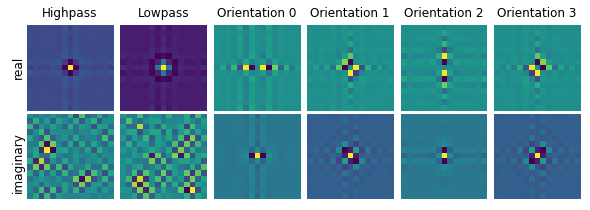

In [3]:
filter_size, n_filters, n_bands =  15, 1, 4
filters_test = get_steerable_filters(filter_size, n_filters, n_bands)

# plot filters
n_levels = len(filters_test)
n_bands = len(filters_test[0]['orientation_real'])

f, axs = plt.subplots(2*n_levels, n_bands + 2 , figsize=(n_levels*10, n_bands*0.8))
for k,v in filters_test.iteritems():
    axs = plot_level(v,axs,k)
    
plt.subplots_adjust(wspace=0.03,hspace=0.03)
axs[0,0].text(-2,6.5, r'real', fontsize=12,  rotation = 90, horizontalalignment='center')
axs[0,0].text(-2,20, r'imaginary', fontsize=12,  rotation = 90, horizontalalignment='center')
plt.show()
        
